In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
user_details = pd.read_excel("Userdetails.xlsx")

In [3]:
user_details

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9
5,U006,Frank Green,25,Austin,2023-06-15,888-777-6666,frank@email.com,Dinner,7
6,U007,Grace King,38,Boston,2023-07-02,999-888-7777,grace@email.com,Breakfast,14
7,U008,Henry Lee,31,Miami,2023-08-11,101-202-3030,henry@email.com,Dinner,5
8,U009,Irene Moore,33,Dallas,2023-09-01,202-303-4040,irene@email.com,Lunch,6
9,U010,Jack White,29,Phoenix,2023-10-10,303-404-5050,jack@email.com,Dinner,8


**User_details Summary**

In [4]:
top_3_orders = user_details.nlargest(3, 'Total Orders')
top_3_orders

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
6,U007,Grace King,38,Boston,2023-07-02,999-888-7777,grace@email.com,Breakfast,14
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12


In [5]:
Favorite_meal_popularity = user_details.groupby('Favorite Meal').agg(Frequency=('User ID', 'count')).reset_index()
Favorite_meal_popularity_desc = Favorite_meal_popularity.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
Favorite_meal_popularity_desc

,Favorite Meal,Frequency
0,Dinner,5
1,Lunch,3
2,Breakfast,2


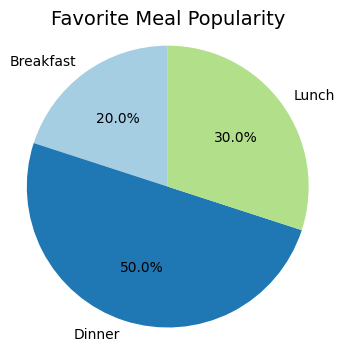

In [6]:
plt.figure(figsize=(4, 4))
plt.pie(Favorite_meal_popularity['Frequency'], labels=Favorite_meal_popularity['Favorite Meal'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Favorite Meal Popularity', fontsize=14)

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

In [7]:
Total_orders = user_details['Total Orders'].sum()
print(Total_orders)

94


**cooking session summary**

In [8]:
cooking_session = pd.read_excel("cookingsession.xlsx")
cooking_session

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1


In [9]:
Avg_Cooking_duration = cooking_session['Duration (mins)'].mean()
Avg_Cooking_duration.astype('int8')

np.int8(30)

In [10]:
Avg_Session_rating = cooking_session['Session Rating'].mean()
Avg_Session_rating.round(1)

np.float64(4.5)

In [11]:
Total_sessions_per_user = cooking_session.groupby('User ID').agg(
    sessions_attended=('Session ID', 'count'), Average_cooking_time = ('Duration (mins)', 'mean')).reset_index()

Total_sessions_per_user['Average_cooking_time'] = Total_sessions_per_user['Average_cooking_time'].astype('int8')

Total_sessions_per_user

,User ID,sessions_attended,Average_cooking_time
0,U001,3,33
1,U002,3,20
2,U003,3,30
3,U004,2,27
4,U005,2,37
5,U006,1,45
6,U007,1,40
7,U008,1,20


In [12]:
session_dish_popularity = cooking_session.groupby('Dish Name').agg(Frequency=('Session ID', 'count')).reset_index()
session_dish_popularity_desc = session_dish_popularity.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
session_dish_popularity_desc

,Dish Name,Frequency
0,Grilled Chicken,4
1,Spaghetti,4
2,Caesar Salad,3
3,Pancakes,2
4,Veggie Burger,2
5,Oatmeal,1


**Order_details_Summary**

In [13]:
Orderdetails = pd.read_excel("Orderdetails.xlsx")
Orderdetails

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005
5,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0,S006
6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0,S007
7,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,NaN,S008
8,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
9,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0,S010


In [14]:
completed_orders = Orderdetails[Orderdetails['Order Status'] == 'Completed']

total_amount_per_customer = completed_orders.groupby('User ID').agg(
    Total_Orders=('Order ID', 'count'),  
    Amount_spent=('Amount (USD)', 'sum')       
).reset_index()

total_amount_per_customer

,User ID,Total_Orders,Amount_spent
0,U001,3,35.0
1,U002,3,31.0
2,U003,1,8.5
3,U004,2,21.5
4,U005,2,22.5
5,U006,1,13.0
6,U007,1,14.0
7,U008,1,11.0


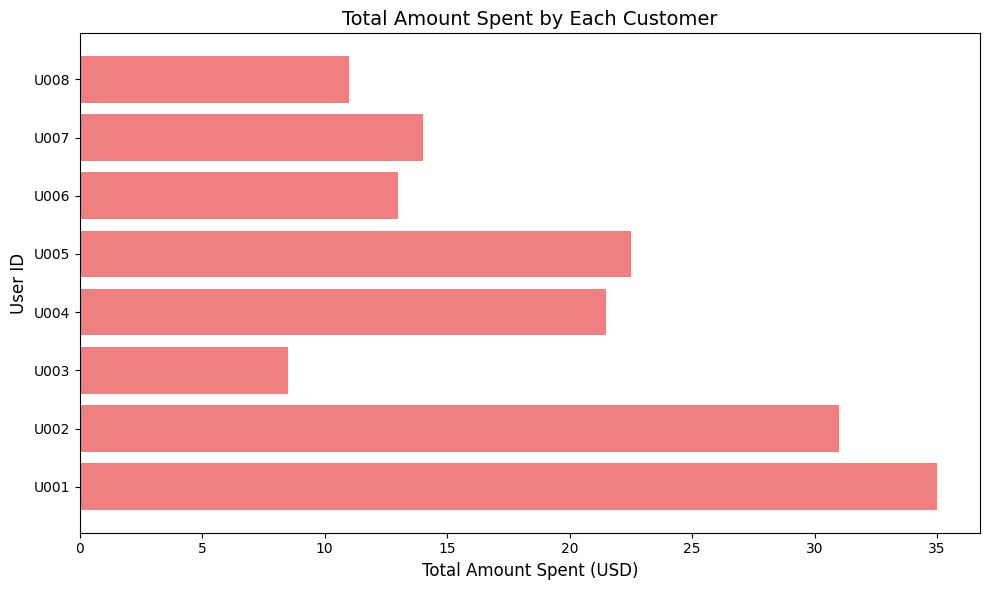

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(total_amount_per_customer['User ID'], total_amount_per_customer['Amount_spent'], color='lightcoral')
plt.xlabel('Total Amount Spent (USD)', fontsize=12)
plt.ylabel('User ID', fontsize=12)
plt.title('Total Amount Spent by Each Customer', fontsize=14)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

In [16]:
Avg_order_rating = Orderdetails['Rating'].mean()
print(Avg_order_rating.round(1))

4.3


In [17]:
dish_popularity = Orderdetails.groupby('Dish Name').agg(Frequency=('Order ID', 'count')).reset_index()
dish_popularity_desc = dish_popularity.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
dish_popularity_desc

,Dish Name,Frequency
0,Grilled Chicken,4
1,Spaghetti,4
2,Caesar Salad,3
3,Pancakes,2
4,Veggie Burger,2
5,Oatmeal,1


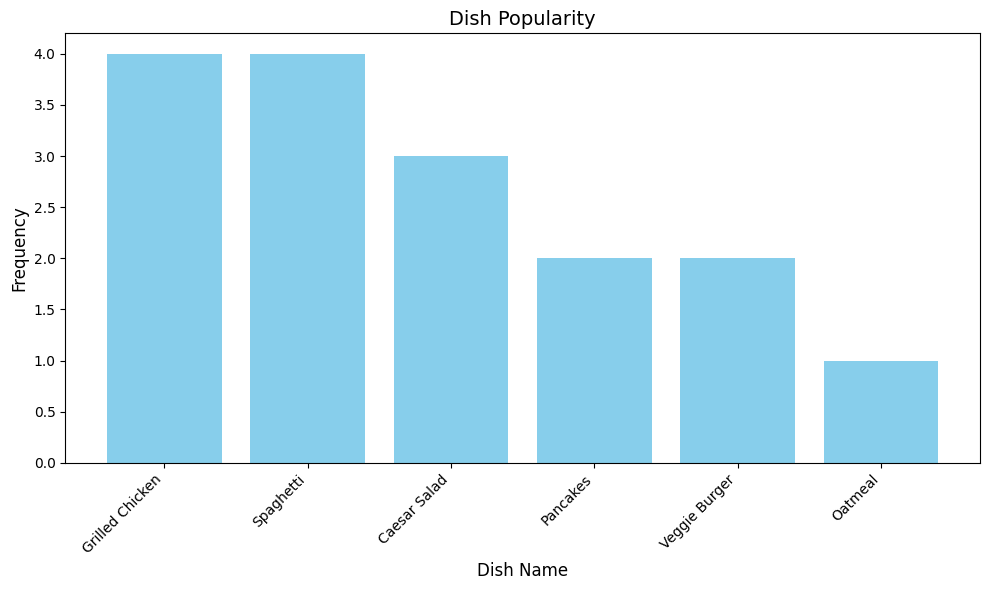

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(dish_popularity_desc['Dish Name'], dish_popularity_desc['Frequency'], color='skyblue')
plt.xlabel('Dish Name', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Dish Popularity', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

In [19]:
Time_of_day_orders = Orderdetails.groupby('Time of Day').agg(Frequency=('Order ID', 'count')).reset_index()
Time_of_day_orders_desc = Time_of_day_orders.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
Time_of_day_orders_desc

,Time of Day,Frequency
0,Night,8
1,Day,5
2,Morning,3


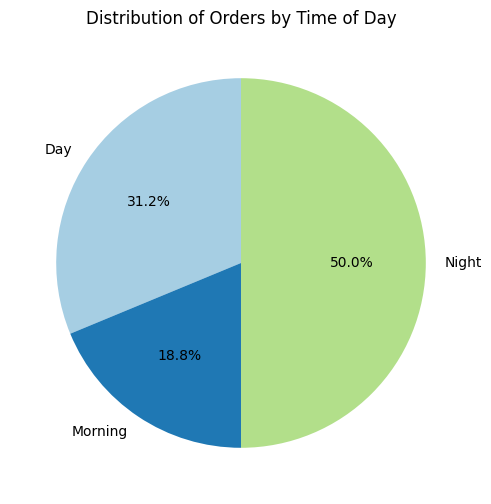

In [20]:
plt.figure(figsize=(8, 6))
plt.pie(
    Time_of_day_orders['Frequency'], 
    labels=Time_of_day_orders['Time of Day'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors
)
plt.title('Distribution of Orders by Time of Day')
plt.show()

**Summary of Users, Cookingsession and Orders data**

In [21]:
summary_user_cookingsession = pd.merge(cooking_session,user_details, on = 'User ID', how = 'left')
summary_user_cookingsession = summary_user_cookingsession[['Session ID','User ID','User Name','Age','Location','Total Orders','Dish Name','Meal Type','Duration (mins)','Session Rating','Favorite Meal']]
summary_user_cookingsession

,Session ID,User ID,User Name,Age,Location,Total Orders,Dish Name,Meal Type,Duration (mins),Session Rating,Favorite Meal
0,S001,U001,Alice Johnson,28,New York,12,Spaghetti,Dinner,30,4.5,Dinner
1,S002,U002,Bob Smith,35,Los Angeles,8,Caesar Salad,Lunch,20,4.0,Lunch
2,S003,U003,Charlie Lee,42,Chicago,15,Grilled Chicken,Dinner,40,4.8,Breakfast
3,S004,U001,Alice Johnson,28,New York,12,Pancakes,Breakfast,30,4.2,Dinner
4,S005,U004,David Brown,27,San Francisco,10,Caesar Salad,Lunch,15,4.7,Dinner
5,S006,U002,Bob Smith,35,Los Angeles,8,Spaghetti,Dinner,30,4.3,Lunch
6,S007,U005,Emma White,30,Seattle,9,Grilled Chicken,Dinner,45,4.6,Lunch
7,S008,U003,Charlie Lee,42,Chicago,15,Veggie Burger,Lunch,20,4.4,Breakfast
8,S009,U001,Alice Johnson,28,New York,12,Grilled Chicken,Dinner,40,4.9,Dinner
9,S010,U002,Bob Smith,35,Los Angeles,8,Oatmeal,Breakfast,10,4.1,Lunch


In [22]:
cooking_favorite_meal = summary_user_cookingsession[summary_user_cookingsession['Meal Type'] == summary_user_cookingsession['Favorite Meal']]
cooking_favorite_meal

,Session ID,User ID,User Name,Age,Location,Total Orders,Dish Name,Meal Type,Duration (mins),Session Rating,Favorite Meal
0,S001,U001,Alice Johnson,28,New York,12,Spaghetti,Dinner,30,4.5,Dinner
1,S002,U002,Bob Smith,35,Los Angeles,8,Caesar Salad,Lunch,20,4.0,Lunch
8,S009,U001,Alice Johnson,28,New York,12,Grilled Chicken,Dinner,40,4.9,Dinner
10,S011,U003,Charlie Lee,42,Chicago,15,Pancakes,Breakfast,30,4.6,Breakfast
11,S012,U004,David Brown,27,San Francisco,10,Spaghetti,Dinner,40,4.7,Dinner
12,S013,U005,Emma White,30,Seattle,9,Caesar Salad,Lunch,30,4.4,Lunch
13,S014,U006,Frank Green,25,Austin,7,Grilled Chicken,Dinner,45,4.8,Dinner


In [23]:

Orderdetails['User Name'] = Orderdetails['Session ID'].map(summary_user_cookingsession.set_index('Session ID')['User Name'])
Orderdetails['Age'] = Orderdetails['Session ID'].map(summary_user_cookingsession.set_index('Session ID')['Age'])
Orderdetails['Location'] = Orderdetails['Session ID'].map(summary_user_cookingsession.set_index('Session ID')['Location'])
Orderdetails['Total Orders'] = Orderdetails['Session ID'].map(summary_user_cookingsession.set_index('Session ID')['Total Orders'])


Orderdetails['Duration (mins)'] = Orderdetails['Session ID'].map(summary_user_cookingsession.set_index('Session ID')['Duration (mins)'])
Orderdetails['Session Rating'] = Orderdetails['Session ID'].map(summary_user_cookingsession.set_index('Session ID')['Session Rating'])
Orderdetails['Favorite Meal'] = Orderdetails['Session ID'].map(summary_user_cookingsession.set_index('Session ID')['Favorite Meal'])
Orderdetails

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID,User Name,Age,Location,Total Orders,Duration (mins),Session Rating,Favorite Meal
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001,Alice Johnson,28,New York,12,30,4.5,Dinner
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002,Bob Smith,35,Los Angeles,8,20,4.0,Lunch
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003,Charlie Lee,42,Chicago,15,40,4.8,Breakfast
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004,Alice Johnson,28,New York,12,30,4.2,Dinner
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005,David Brown,27,San Francisco,10,15,4.7,Dinner
5,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0,S006,Bob Smith,35,Los Angeles,8,30,4.3,Lunch
6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0,S007,Emma White,30,Seattle,9,45,4.6,Lunch
7,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,NaN,S008,Charlie Lee,42,Chicago,15,20,4.4,Breakfast
8,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009,Alice Johnson,28,New York,12,40,4.9,Dinner
9,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0,S010,Bob Smith,35,Los Angeles,8,10,4.1,Lunch


In [28]:
orders_by_rating = Orderdetails.groupby('Rating')['Order ID'].count().reset_index()
orders_by_rating.rename(columns={'Order ID': 'Total Orders'}, inplace=True)
orders_by_rating

,Rating,Total Orders
0,4.0,10
1,5.0,4


In [31]:
orders_by_location = Orderdetails.groupby('Location')['Order ID'].count().reset_index()
orders_by_location.rename(columns={'Order ID': 'Total Orders'}, inplace=True)
orders_by_location

,Location,Total Orders
0,Austin,1
1,Boston,1
2,Chicago,3
3,Los Angeles,3
4,Miami,1
5,New York,3
6,San Francisco,2
7,Seattle,2
